## Step 1: Obtain data by generating randomly

In [1]:
import random

def generate_sample_data_3d(coeff1, coeff2, num_samples = 40, x3_spread = 30.0):
    data = []
    for x1 in range(0, num_samples):
        for x2 in range(0, num_samples):
            x3 = round(coeff1 * x1 + coeff2 * x2 + x3_spread * (random.random() - 0.5), 2)
            data.append((x1, x2, x3))
    return data

In [2]:
coeff1 = random.uniform(1.0, 2.0)
coeff2 = random.uniform(1.0, 2.0)
print("Coefficients during generation: ", (coeff1, coeff2))
data = generate_sample_data_3d(coeff1, coeff2)

Coefficients during generation:  (1.5034714960108486, 1.2478015624148737)


## Step 2: Divide the data into two sets: a training set and a testing set

In [3]:
def split_training_test(data, proportion_train = 0.5):
    indices = random.sample(range(len(data)), int(proportion_train * len(data)))
    train = []
    test = []
    for i in range(len(data)): 
        if i in indices: train.append(data[i])
        else: test.append(data[i])
    return (train, test)

In [4]:
(data_train, data_test) = split_training_test(data)
print(data_train)
print(data_test)

[(0, 1, 11.93), (0, 2, 11.23), (0, 3, 7.07), (0, 7, 11.66), (0, 8, 13.3), (0, 9, 11.32), (0, 12, 29.43), (0, 13, 29.64), (0, 14, 5.93), (0, 17, 19.41), (0, 18, 29.12), (0, 19, 21.07), (0, 21, 24.76), (0, 23, 32.89), (0, 28, 45.52), (0, 30, 43.4), (0, 31, 47.71), (0, 36, 49.8), (0, 37, 52.83), (0, 38, 37.97), (0, 39, 36.43), (1, 0, -0.08), (1, 2, 12.38), (1, 7, 15.32), (1, 8, 6.47), (1, 10, 9.22), (1, 11, 21.63), (1, 12, 21.17), (1, 15, 8.56), (1, 17, 26.8), (1, 21, 31.35), (1, 22, 27.93), (1, 23, 30.0), (1, 24, 30.71), (1, 25, 31.38), (1, 26, 36.78), (1, 27, 34.27), (1, 29, 40.1), (1, 31, 35.8), (1, 32, 35.21), (1, 36, 50.8), (1, 39, 54.4), (2, 1, -0.11), (2, 4, 2.87), (2, 5, 8.96), (2, 10, 16.52), (2, 11, 11.35), (2, 12, 9.49), (2, 14, 8.77), (2, 18, 14.6), (2, 20, 34.92), (2, 21, 35.16), (2, 26, 49.84), (2, 28, 47.05), (2, 30, 42.62), (2, 33, 50.1), (2, 34, 31.76), (2, 38, 64.48), (3, 1, 11.19), (3, 2, 15.95), (3, 5, 12.07), (3, 6, 25.47), (3, 7, 11.99), (3, 8, 18.45), (3, 9, 13.57),

/home/biren_dave/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


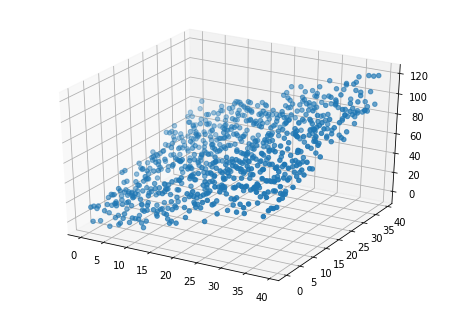

In [6]:
%matplotlib inline
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

x_train = [p[:-1] for p in data_train]
x3_train = [p[-1] for p in data_train]

fig = pyplot.figure(1)
ax = Axes3D(fig)

x1_train = [p[0] for p in data_train]
x2_train = [p[1] for p in data_train]
ax.scatter(x1_train, x2_train, x3_train)
fig.show()

## Step 3: Run linear regression on training data

In [7]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, x3_train)

print('Estimated coefficient: ', regr.coef_)
print('Estimated intercept:   ', regr.intercept_)

Estimated coefficient:  [1.49063453 1.27276844]
Estimated intercept:    -0.1450873147149565


## Step 4: Predict the y value of the testing data from its x values

/home/biren_dave/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


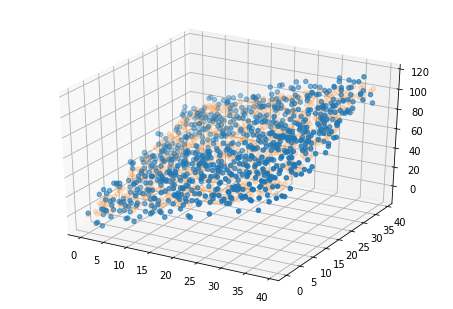

In [8]:
x_test = [p[:-1] for p in data_test]
x3_test = [p[-1] for p in data_test]
x3_pred = regr.predict(x_test)

fig = pyplot.figure(2)
ax = Axes3D(fig)

x1_test = [p[0] for p in data_test]
x2_test = [p[1] for p in data_test]
ax.scatter(x1_test, x2_test, x3_test)
ax.scatter(x1_test, x2_test, x3_pred, alpha=0.2)
fig.show()

## Step 5: Measure how far the predicted y values are from the real y values in the testing data set

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(x3_test, x3_pred)
r2score = r2_score(x3_test, x3_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2score))

Mean squared error: 77.79
R2 score: 0.87
